Demo using fake data

In [1]:
%matplotlib inline
from __future__ import division, print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import query_wise_mask

In [2]:
# Create fake data
ramin, ramax = 206.5, 207.5
decmin, decmax = -63, -62.4
ra = np.random.uniform(ramin, ramax, int(1e5))
dec = np.random.uniform(decmin, decmax, int(1e5))

In [3]:
# Obtain WISE mask value at each location
mask_value = query_wise_mask.query_mask_value(ra, dec, n_match=4)

Matching to the nearest WISE coadds

Finding the nearest coadd
0%
33%
67%
96330 (96.3%) objects inside the nearest coadd

Finding the second nearest coadd
0%
25%
50%
75%
26092 (26.1%) objects inside the second nearest coadd

Finding the third nearest coadd
0%
25%
50%
75%
4614 (4.6%) objects inside the third nearest coadd

Finding the fourth nearest coadd
0%
33%
67%
0 (0.0%) objects inside the fourth nearest coadd

92624 (92.6%) objects belong to the nearest coadd
7376 (7.4%) objects belong to the second nearest coadd
0 (0.0%) objects belong to the third nearest coadd

Obtaining mask values from images
0%
33%
67%


In [4]:
# def write_ds9_region(fn, ra, dec):

#     # Region file format: DS9 version 4.1
#     header = '# Region file format: DS9 version 4.1\nglobal color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1\nfk5\n'

#     with open(fn, 'w+') as f:
#         f.write(header)
#         for index in range(len(ra)):
#             line = 'point({:.7f},{:.7f}) # point=x\n'.format(ra[index], dec[index])
#             f.write(line)
            
# mask = (mask_value!=0)
# fn = '/global/u2/r/rongpu/test/masked1.reg'
# write_ds9_region(fn, ra[mask], dec[mask])

# mask = (mask_value==0)
# fn = '/global/u2/r/rongpu/test/unmasked1.reg'
# write_ds9_region(fn, ra[mask], dec[mask])

-----------
## Verify

In [5]:
# Obtain intermediate values
coadd_idx, pixcrd_x, pixcrd_y = query_wise_mask.query_wise_coadd(ra, dec, n_match=4, verbose=False)

# Load coadd table
coadd = Table.read(query_wise_mask.coadd_fn)

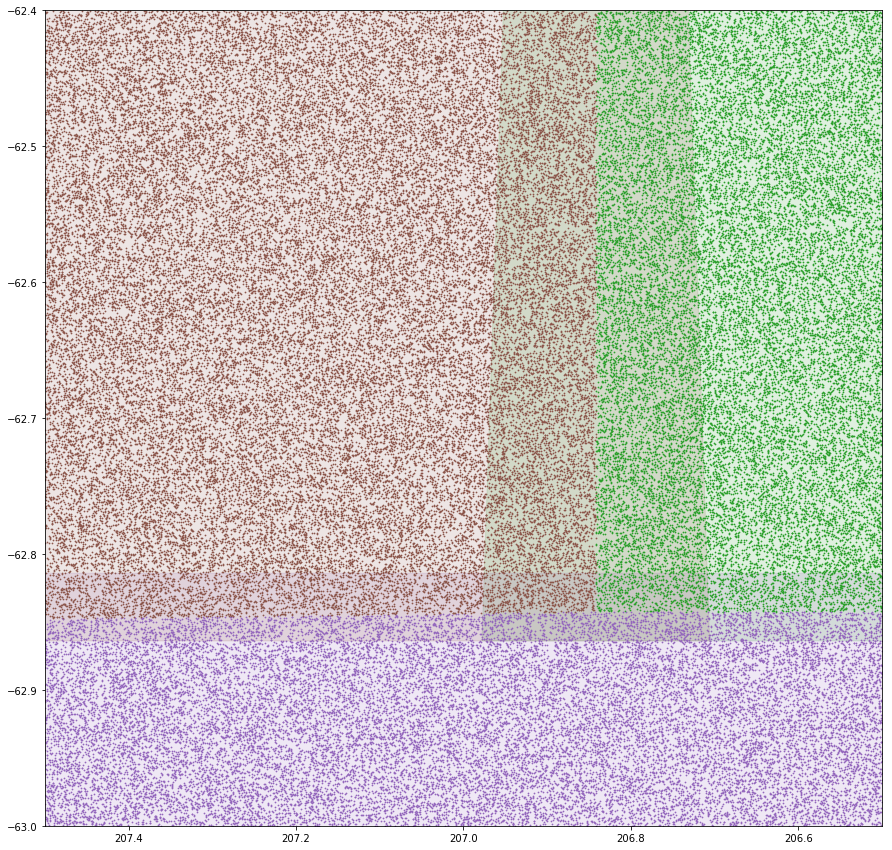

In [6]:
color_index = 0
patches = []
colors =[]
fig, ax = plt.subplots(figsize=(15, 15))
for index in range(len(coadd)):
    if (ramin-3<coadd['ra_center'][index]<ramax+3) and (decmin-2<coadd['dec_center'][index]<decmax+2):
        polygon = Polygon(
            np.stack((coadd['ra_corners'][index], 
                      coadd['dec_corners'][index])).transpose(),
                      True)
        patches.append(polygon)
        colors.append('C{}'.format(color_index%10))
        plt.plot(coadd['ra_center'][index], coadd['dec_center'][index], 'C{}x'.format(color_index%10), markersize=15)
        mask = (coadd_idx==index)
        plt.plot(ra[mask], dec[mask], 'C{}.'.format(color_index%10), markersize=1.5)
        color_index += 1
p = PatchCollection(patches, alpha=0.15)
p.set_color(colors)
ax.add_collection(p)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()

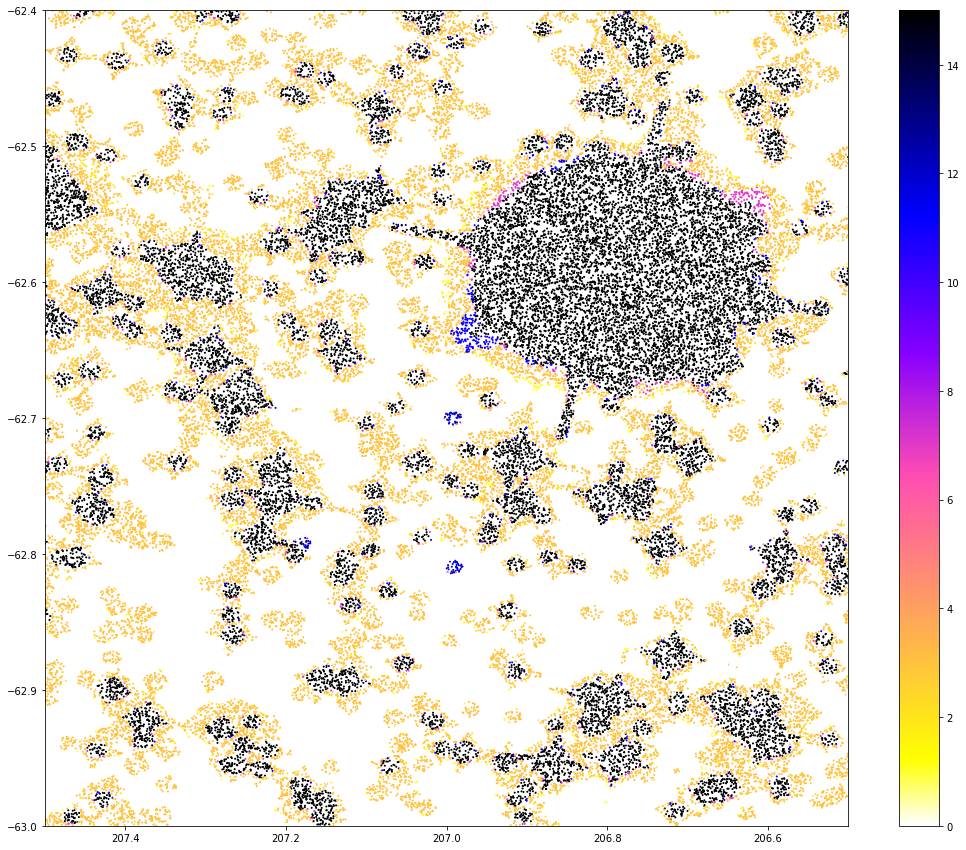

In [7]:
fig, ax = plt.subplots(figsize=(18, 15))
# ax.set_facecolor('black')
im = ax.scatter(ra, dec, c=mask_value, cmap='gnuplot2_r', s=1, edgecolors=None)
fig.colorbar(im, ax=ax)
plt.axis([ramax, ramin, decmin, decmax])
plt.show()